# Jupyter notebook for Network Science Project : Bakery, by Arthur LECOCQ

Source of the dataset : [dataset](https://www.kaggle.com/datasets/matthieugimbert/french-bakery-daily-sales)

# Table of contents
- [Requirements](#requirements)
- [Libraries used](#libraries-used)
- [Function files access](#function-files-access)
- [Useful variables](#useful-variables)
- [Dataframes](#dataframes)
- [Illustrations](#illustrations)
    - [Histograms](#histograms)
    - [Diagrams](#diagrams)
    - [Categorization](#categorization)
    - [Remaks](#remarks)
- [Gephi files creation & maps](#gephi-files-creation--maps)
- [PageRank](#pagerank)

## Requirements
To ease the use of this Jupyter Book, I grouped all needed libraries in [requirements.txt](requirements.txt).\
You can run the following code section to install them.

In [ ]:
!python3 -m pip install --upgrade pip
!python3 -m pip install -r requirements.txt

## Libraries used

In [62]:
import sys
import os
import pandas as pd
import numpy as np
from cdlib import algorithms
import networkx as nx
import community
import matplotlib.pyplot as plt
import matplotlib.cm as cm

`sys` and `os` libraries are used to have access to all other files. More explanations after.\
`pandas` library is used to create dataframes in order to manipulate datas.\
`numpy` is for severals tools, like math functions or variables.\
`matplotlib` is used to get graphes and illustrations.

## Function files access

In [20]:
currentDir = os.path.abspath(os.getcwd())
sys.path.append(currentDir + "/functions")

import figures
import manipulations
import intels
import graphes

I separated functions in differents python files, for more clarity. There all are in [functions](/functions/).\
To have access to this folder, we use the two first lines, and after that we're able to import created functions as libraries.

## Useful variables :

In [32]:
## Files variables
FILE = "data/Bakery Sales.csv"
LARGE_CAT = "data/large categories.csv"
NORMAL_CAT = "data/normal categories.csv"

## Path files variables
NORMAL_DATA = "data/normal group/"
LARGE_DATA = "data/large group/"

## Path images files variables
IMAGES = "images/"
LARGE_GROUP = "images/categories/large/"
NORMAL_GROUP = "images/categories/normal/"

## Other ariables
THRESHOLDS = [0, 0.5, 1, 2]

## Dataframes

In [31]:
## Original dataframe
dataFrame = manipulations.createDataFrame(FILE)
print("Content of dataframe :\n",dataFrame)

## Period dataframes
dataFrame2021 = dataFrame[dataFrame["date"].dt.year == 2021]
dataFrame2022 = dataFrame[dataFrame["date"].dt.year == 2022]

## Some other dataframes
menu = manipulations.getItemsAndPrice(dataFrame)
itemsSold = manipulations.getTotalItemsSold(dataFrame)
itemsSold2021 = manipulations.getTotalItemsSold(dataFrame2021)
itemsSold2022 = manipulations.getTotalItemsSold(dataFrame2022)

## Categorized dataframes
largeGroupedDataFrame = manipulations.groupedCategories(dataFrame, LARGE_CAT)
normalGroupedDataFrame = manipulations.groupedCategories(dataFrame, NORMAL_CAT)
largeGroupedDataFrame = manipulations.changeReference(dataFrame, LARGE_CAT)
normalGroupedDataFrame = manipulations.changeReference(dataFrame, NORMAL_CAT)

Content of dataframe :
              date   time  ticket_number               article  Quantity  \
0      2021-01-02  08:38       150040.0              BAGUETTE       1.0   
1      2021-01-02  08:38       150040.0      PAIN AU CHOCOLAT       3.0   
2      2021-01-02  09:14       150041.0      PAIN AU CHOCOLAT       2.0   
3      2021-01-02  09:14       150041.0                  PAIN       1.0   
4      2021-01-02  09:25       150042.0  TRADITIONAL BAGUETTE       5.0   
...           ...    ...            ...                   ...       ...   
234000 2022-09-30  18:52       288911.0                 COUPE       1.0   
234001 2022-09-30  18:52       288911.0            BOULE 200G       1.0   
234002 2022-09-30  18:52       288911.0                 COUPE       2.0   
234003 2022-09-30  18:55       288912.0  TRADITIONAL BAGUETTE       1.0   
234004 2022-09-30  18:56       288913.0  TRADITIONAL BAGUETTE       1.0   

        unit_price  total  
0             0.90   0.90  
1             1.20 

Here is the content of my initial dataframe after I cleaned some useless parts.
We can see 7 columns we will use during this project :
- data, in the format *YYYY-MM-DD*
- time, which the hour of the transaction
- ticker_number
- article
- Quantity
- unit_price
- total

Each row correspond to the sale of an article in a certain quantity for a client.\
If a client buys severals items in one transaction, there will be severals rows with the same ticket number but with different articles bought.

## Illustrations
### Histograms
First illustrations made are some statistical histograms to show which period are the most important to sell a lot of articles, during the day, the week or the day.

/Users/arthur/Downloads/NSP/functions/figures.py:141: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataFrame["Time period"] = pd.to_datetime(dataFrame["time"]).dt.hour


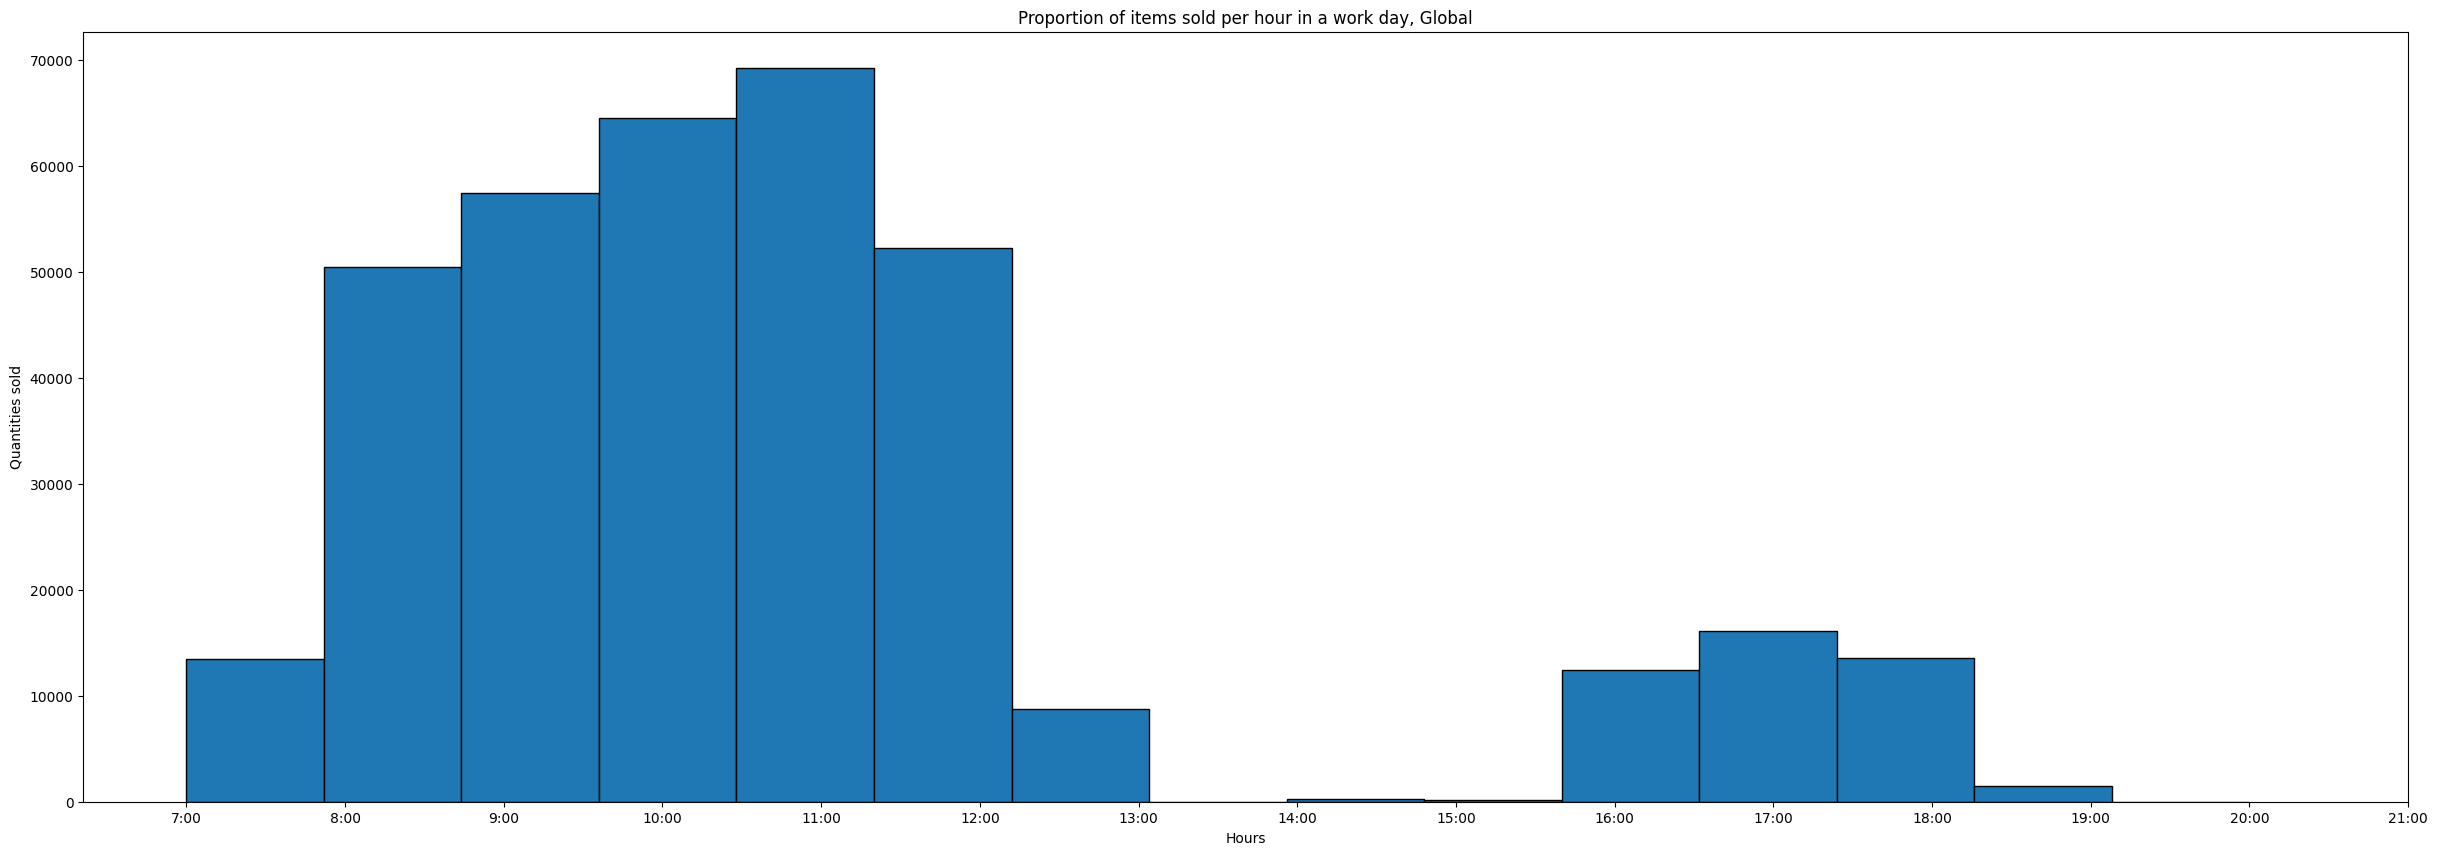

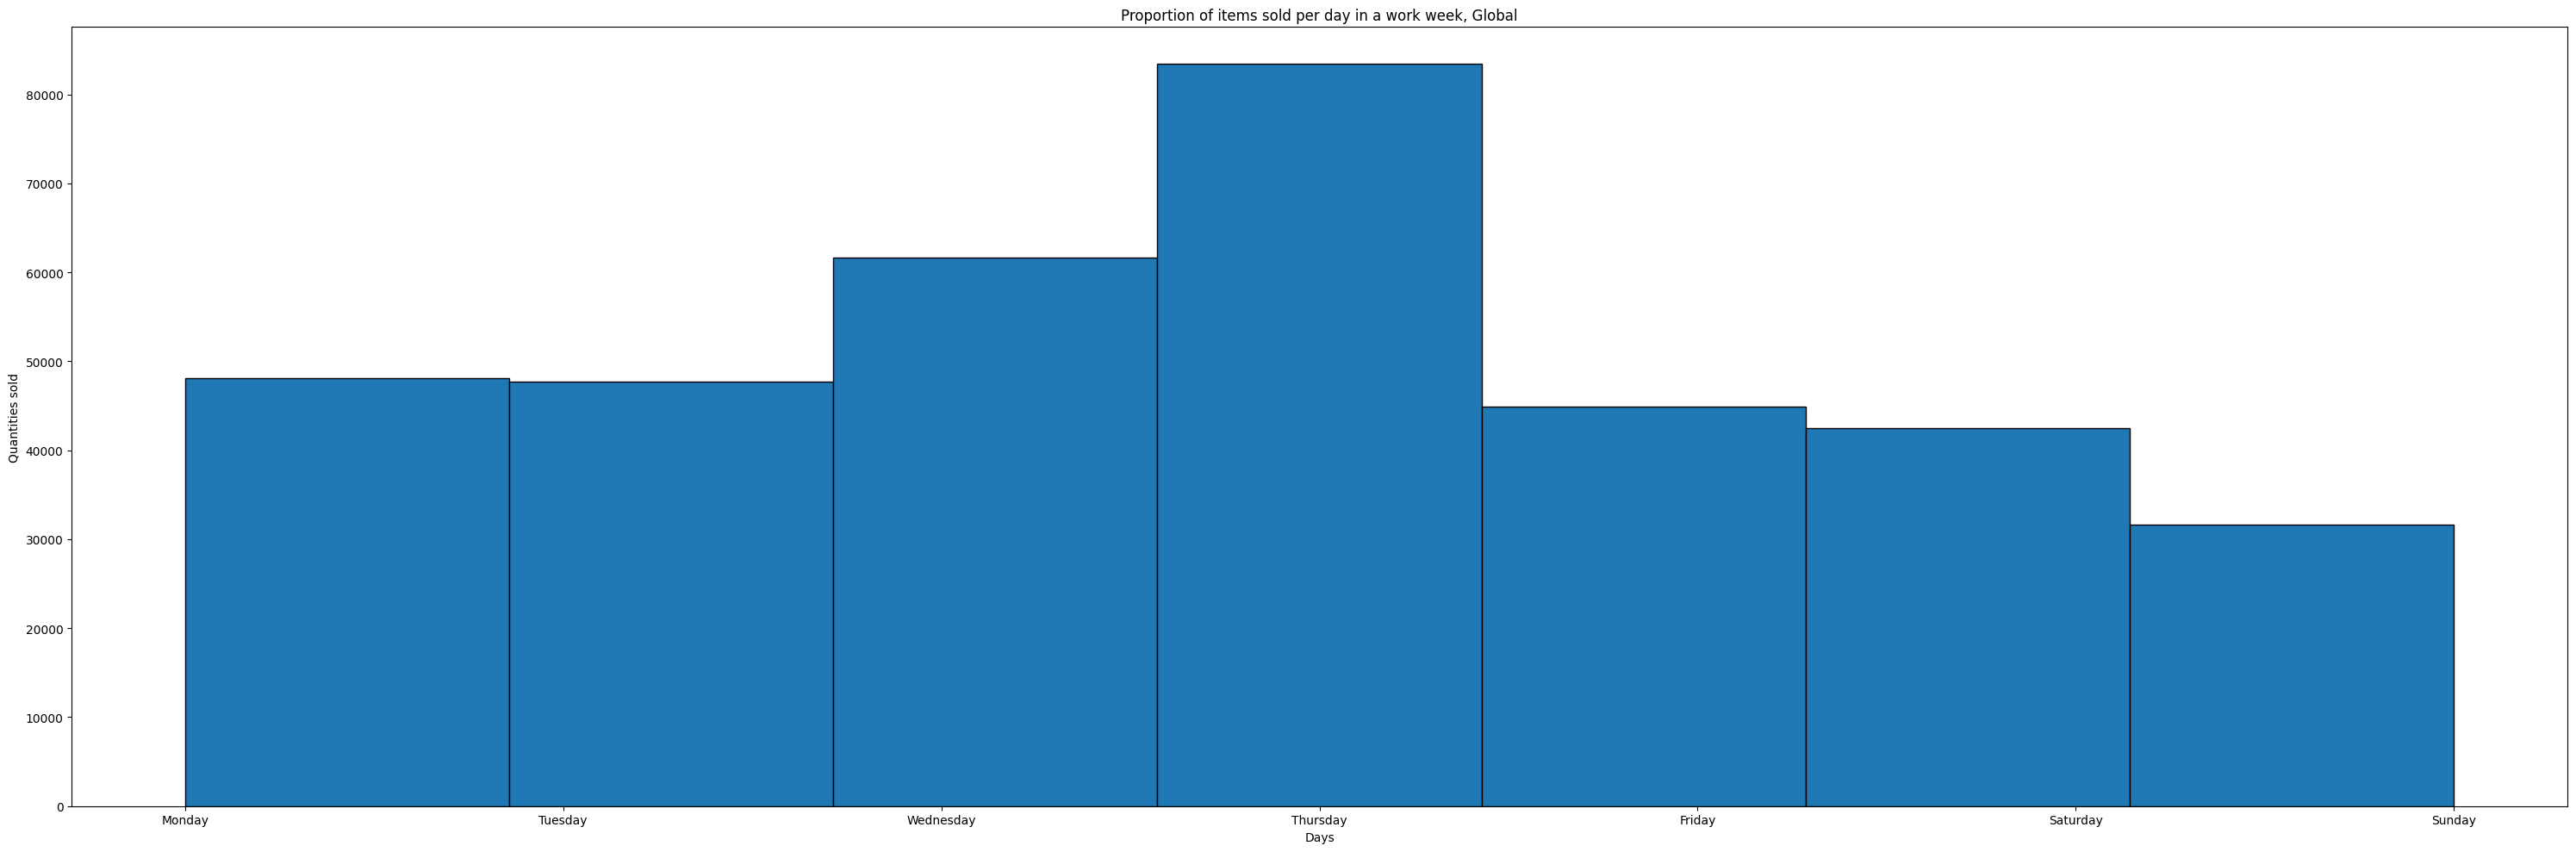

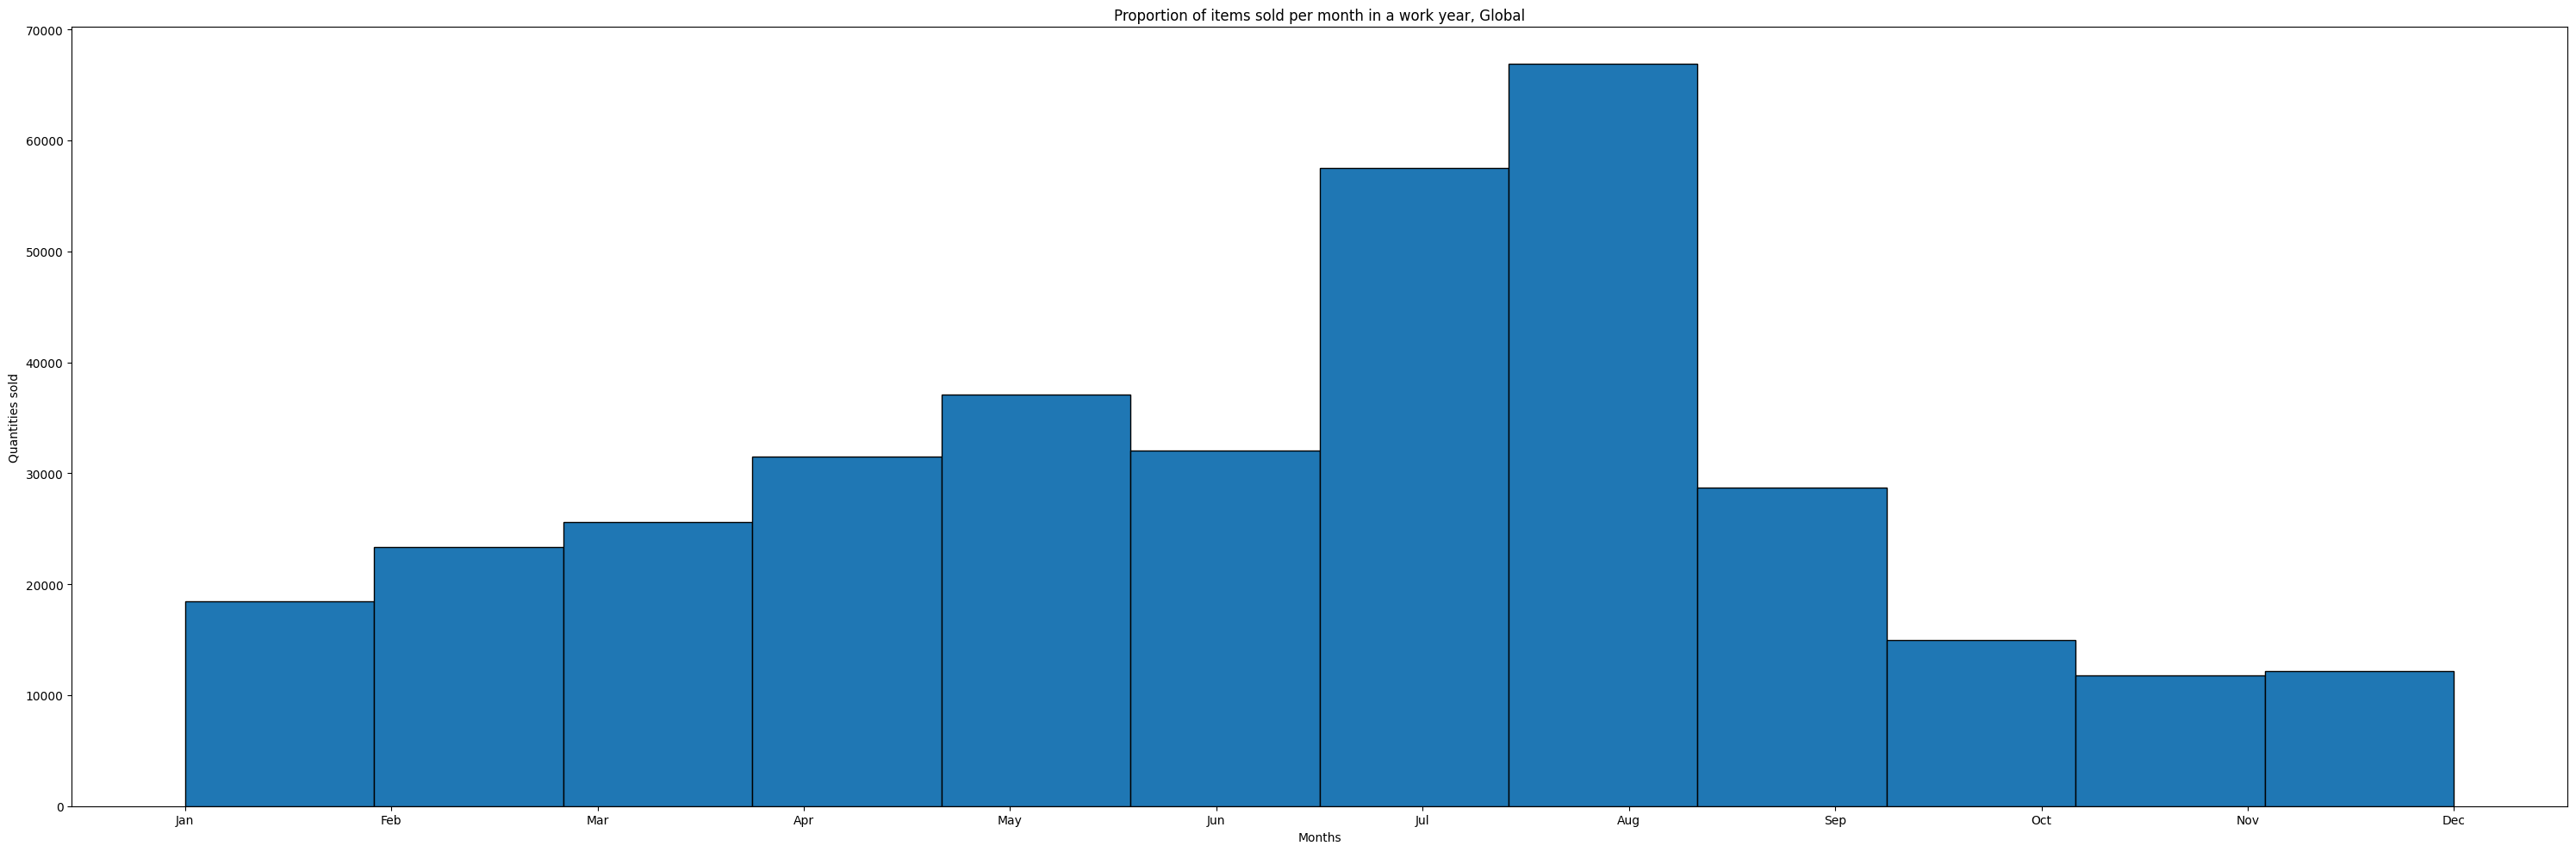

In [46]:
figures.getIllustrations(dataFrame, "Global", IMAGES)

Then, the next illustrations are two histograms to show the difference between the price and the quantity sold of articles.

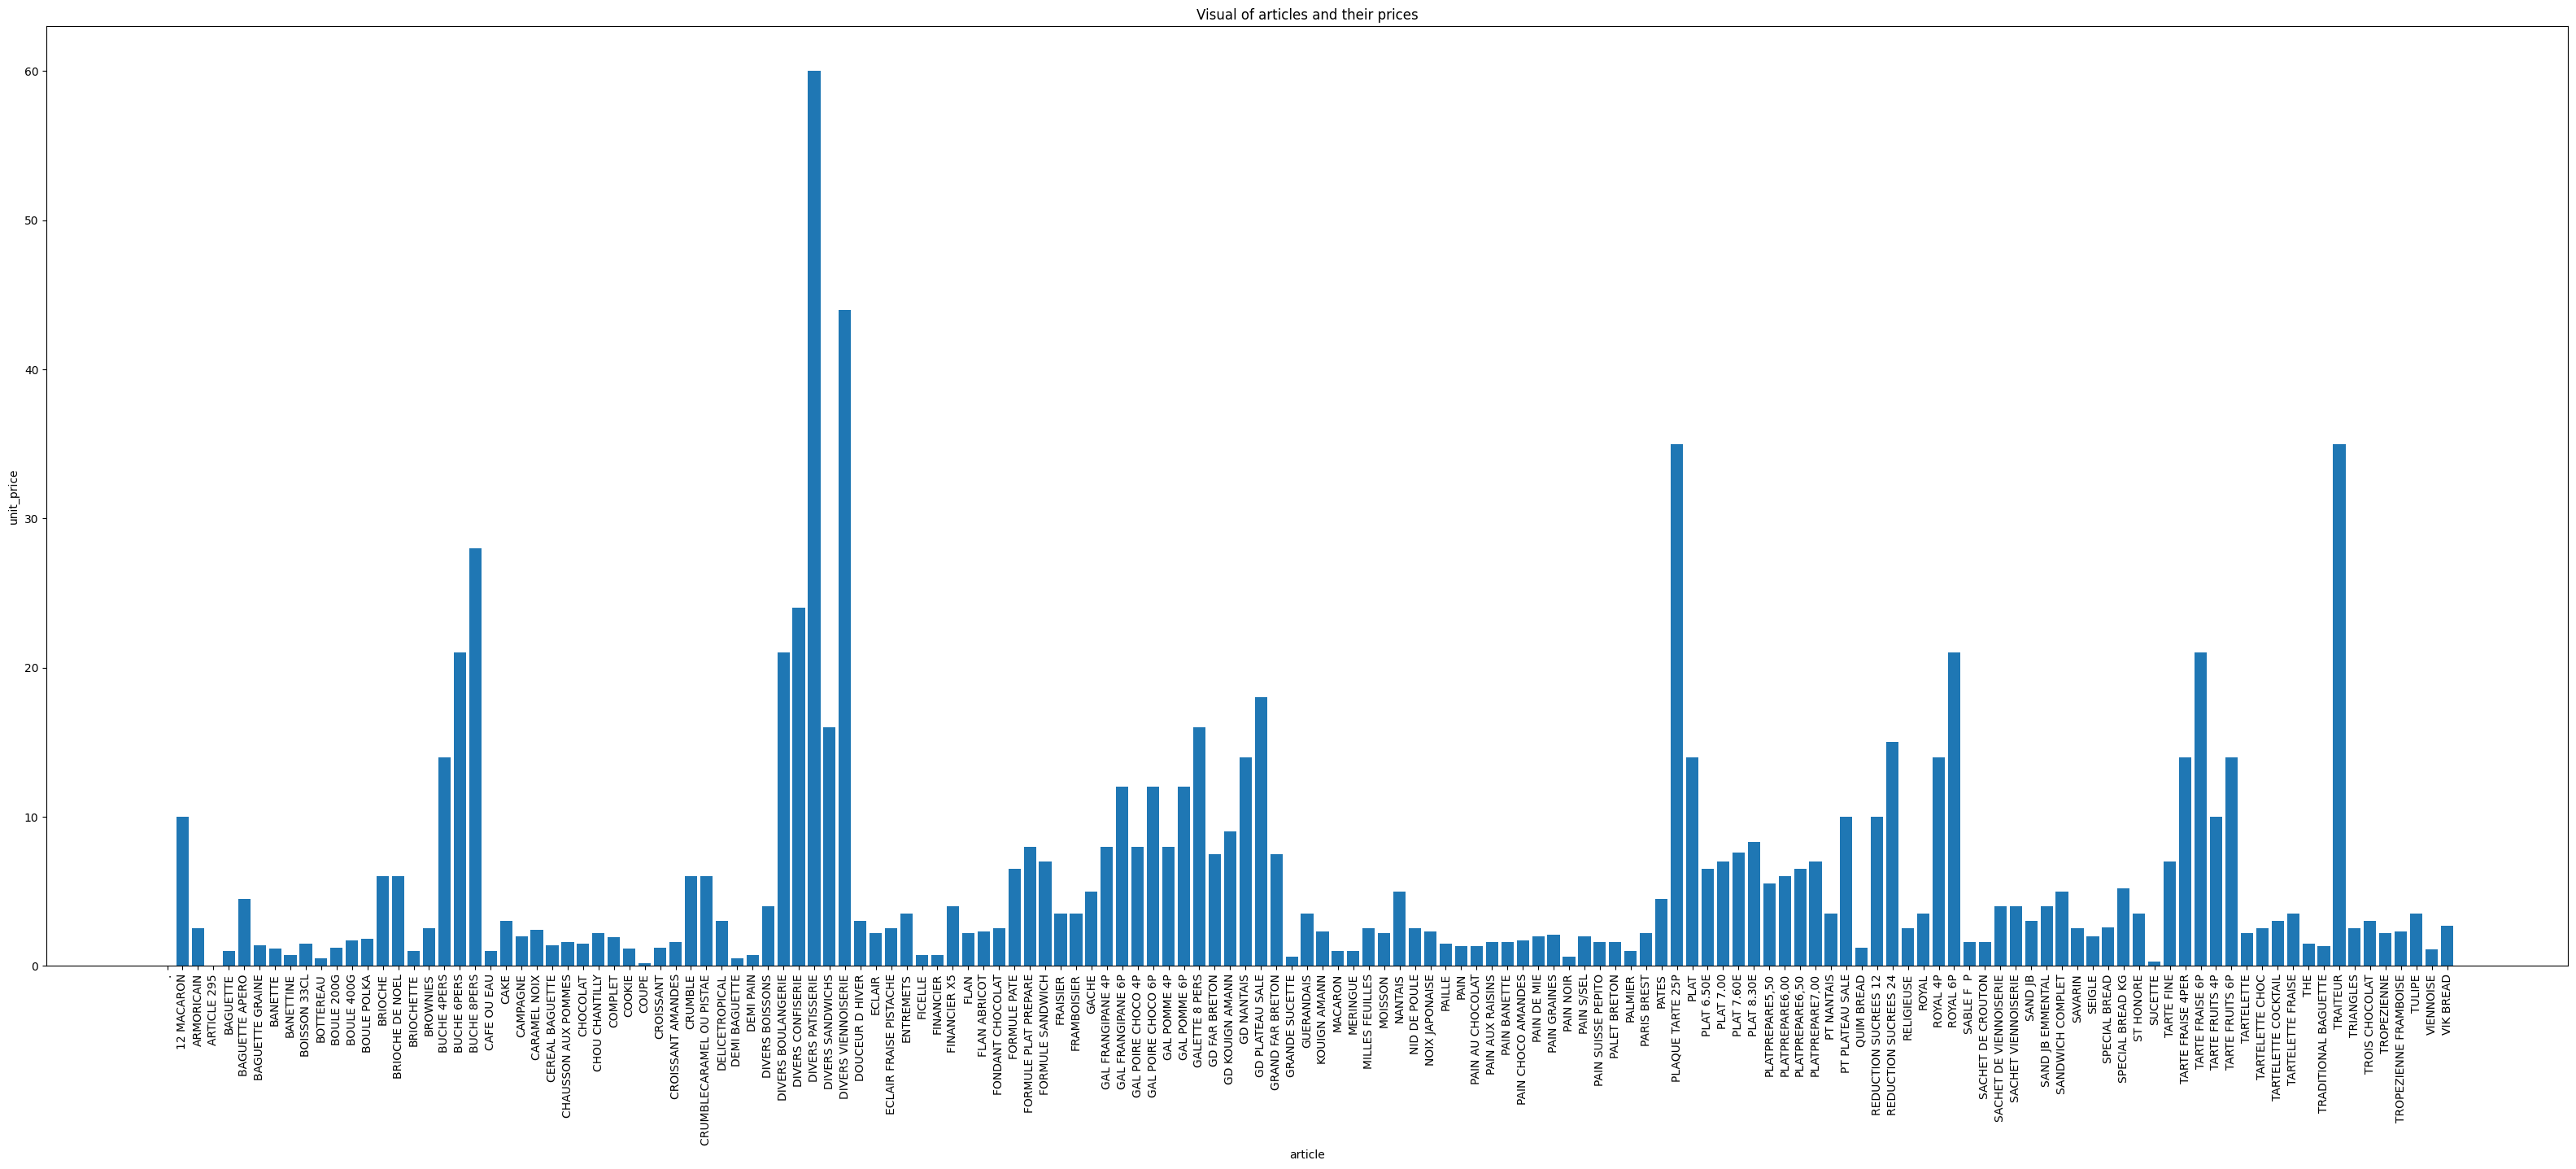

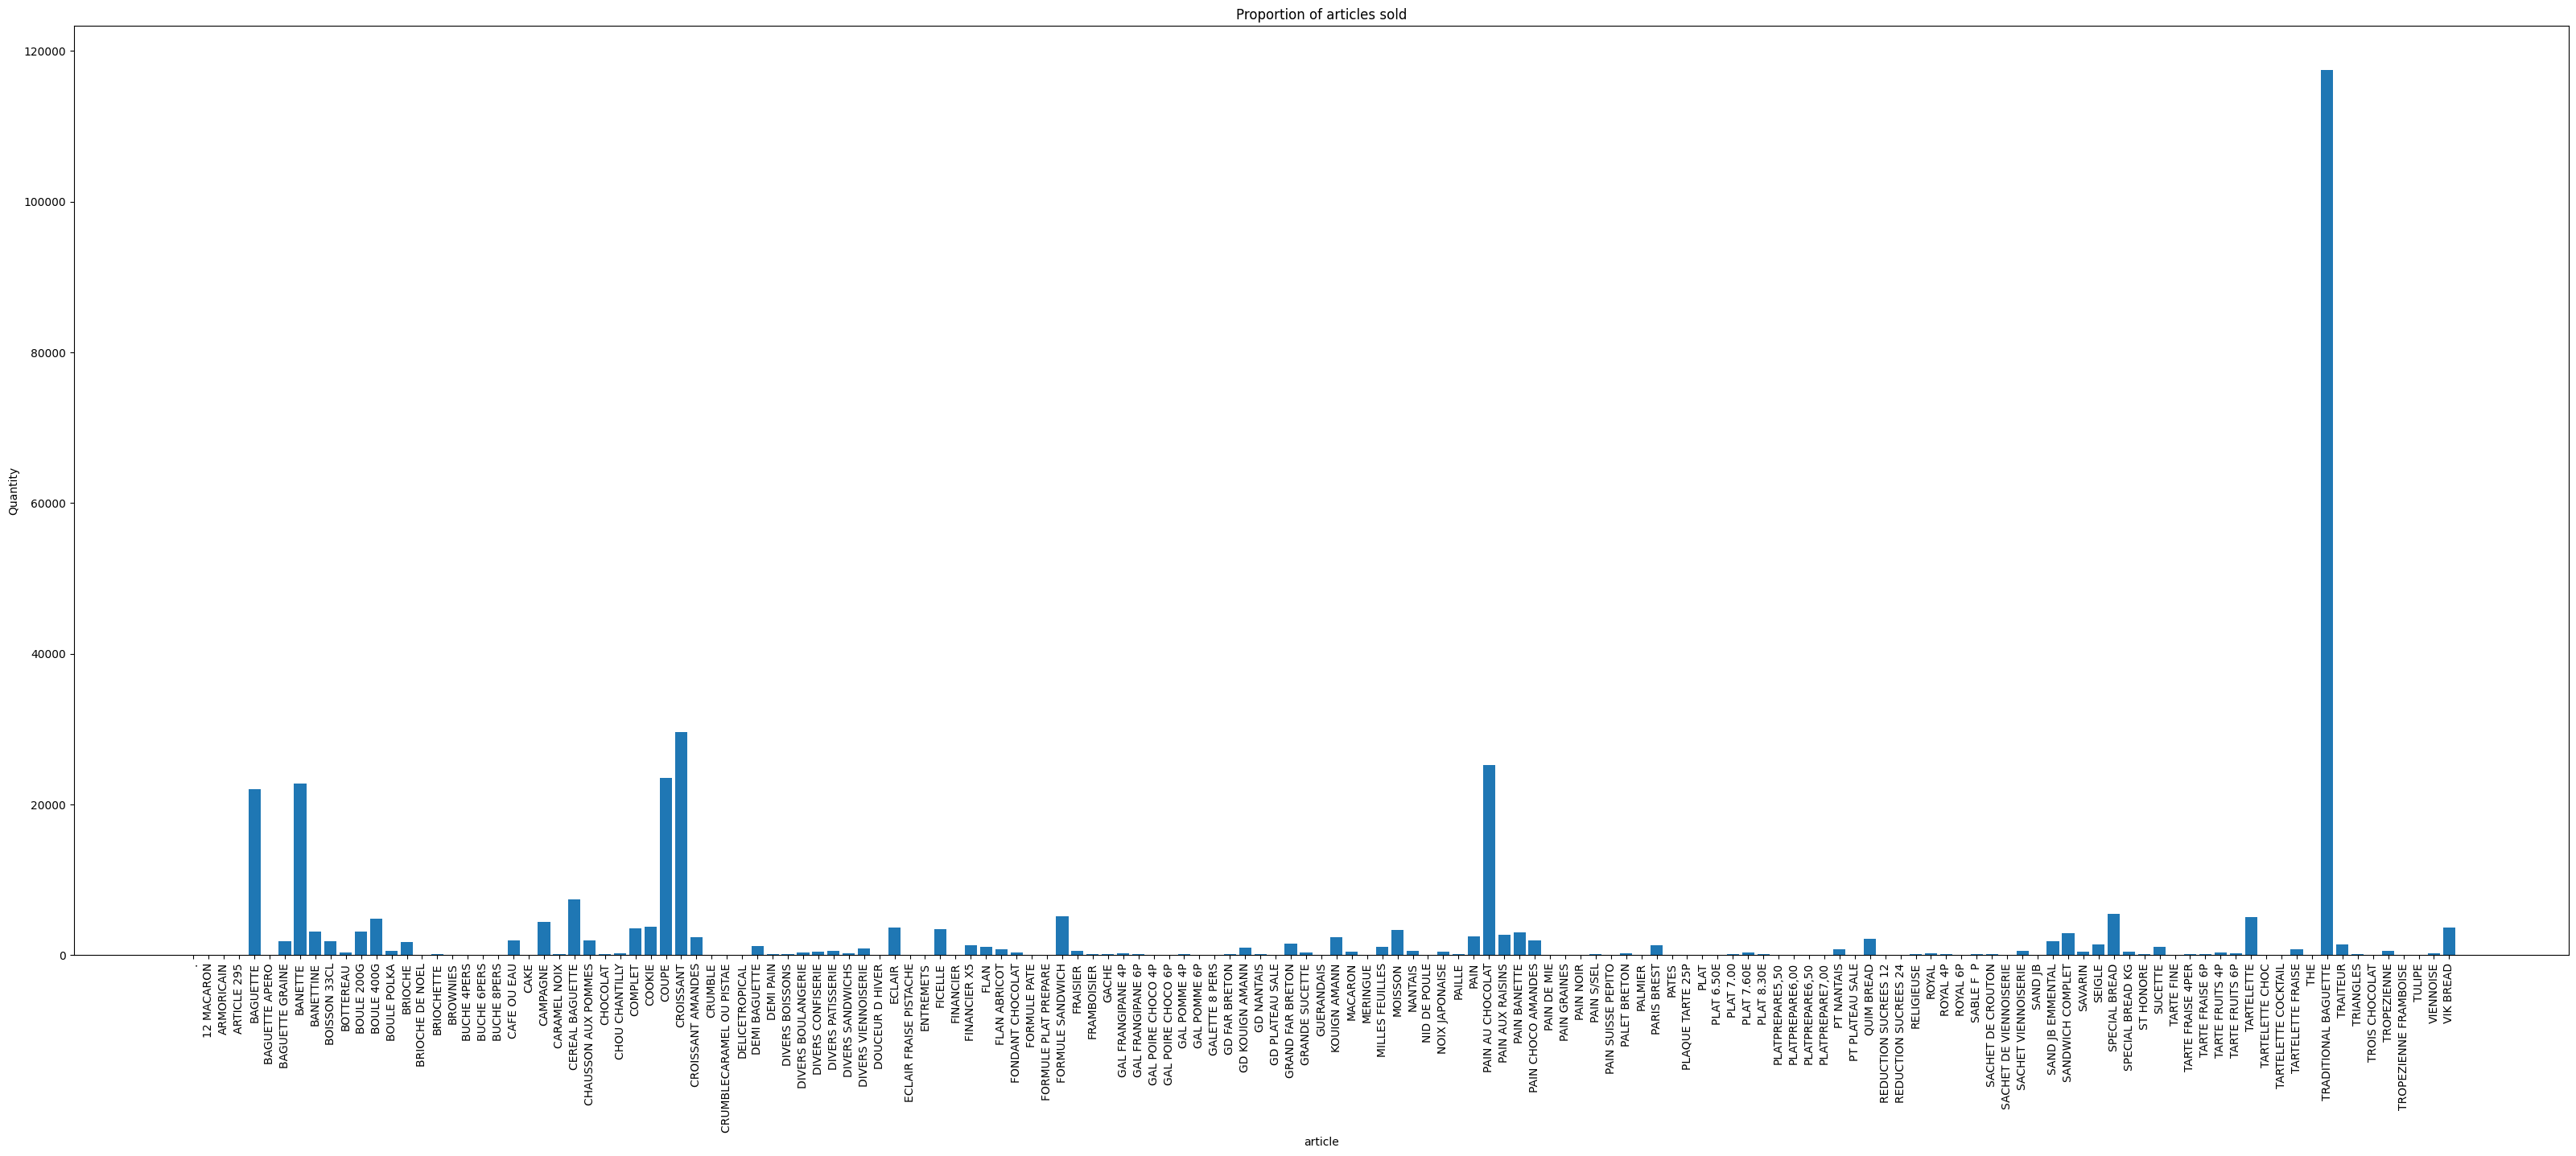

In [35]:
figures.createHistogram(
    menu,
    "article",
    "unit_price",
    "Visual of articles and their prices",
    "Articles_Prices",
    IMAGES,
)
figures.createHistogram(
    itemsSold,
    "article",
    "Quantity",
    "Proportion of articles sold",
    "Quantity_Sold",
    IMAGES,
)

### Diagrams
Following this, we can create a diagram of annual sales to see better which articles are the most popular in the bakery.

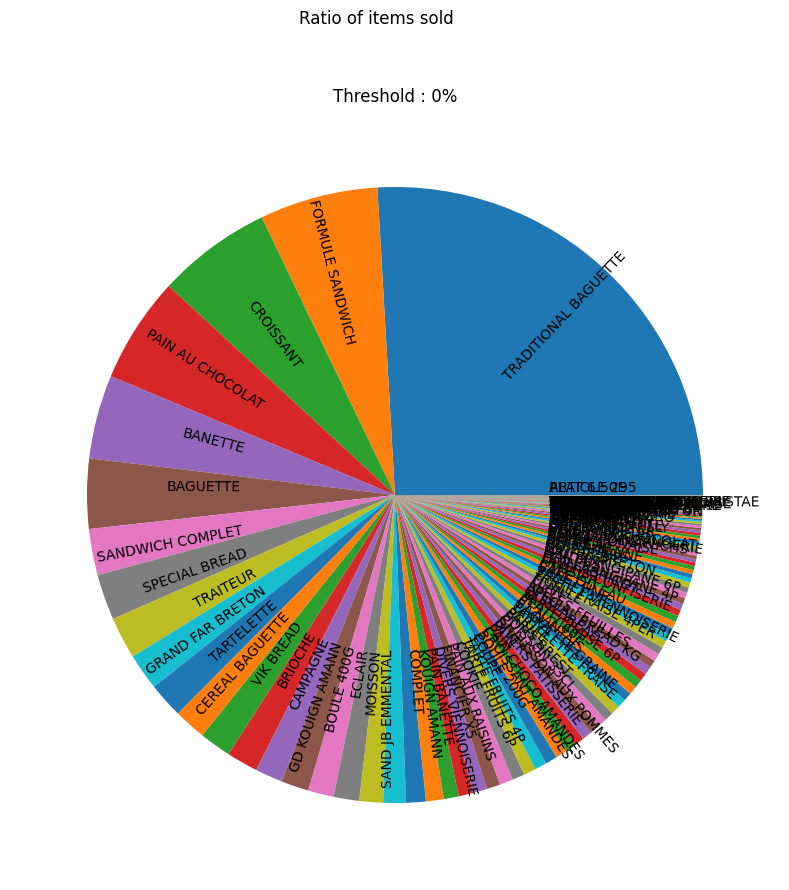

In [44]:
figures.getAnnualSales(dataFrame, [0], "", IMAGES)

As you see, some articles have a few proportion and doesn't contribute to have a clear diagram, even if we scale it.\
To solve this problem, I decided to apply a threshold to group them if their proportion is less than the chosen threshold.\
This is the results for a 0.5%, 1% and 2% thresholds.

/Users/arthur/Downloads/NSP/functions/manipulations.py:122: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  articlesGrouped[0] = "Others (" + str(othersArticlesNumber) + " articles)"
/Users/arthur/Downloads/NSP/functions/manipulations.py:122: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  articlesGrouped[0] = "Others (" + str(othersArticlesNumber) + " articles)"
/Users/arthur/Downloads/NSP/functions/manipulations.py:122: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a va

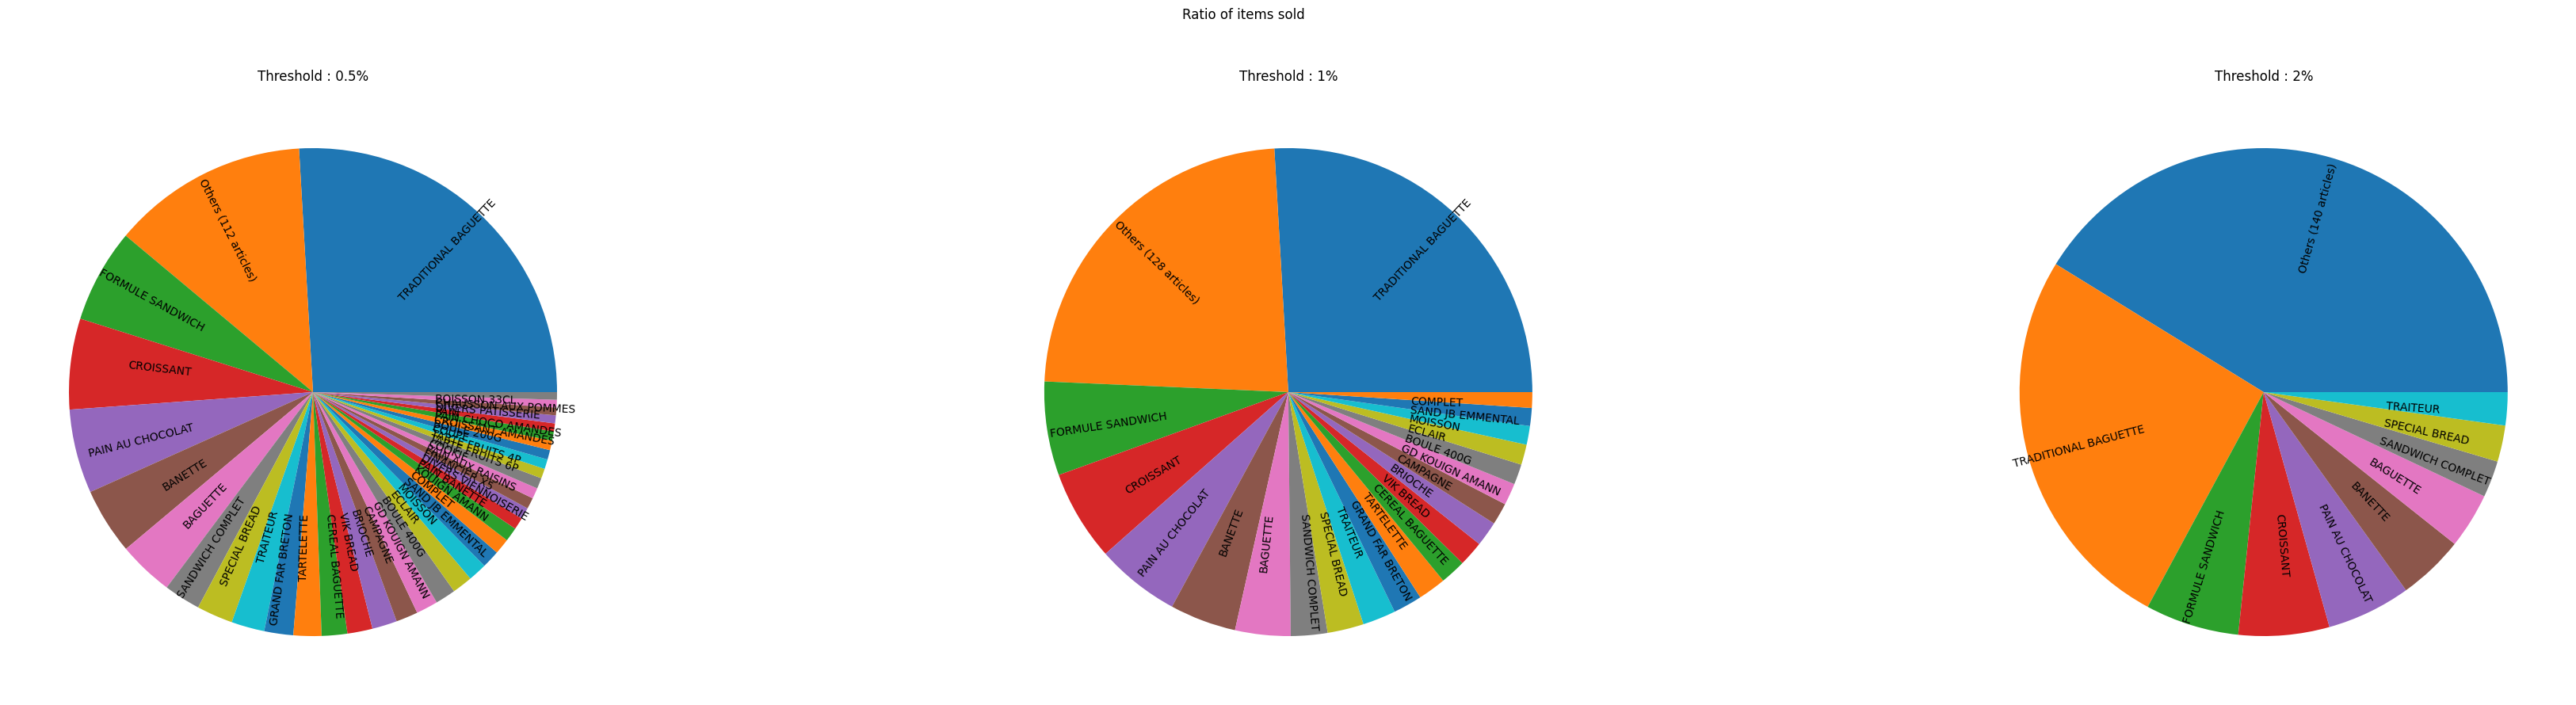

In [45]:
figures.getAnnualSales(dataFrame, THRESHOLDS[1:], "", IMAGES)

### Categorization
If we look into the dataset, we can see similar articles. For example, the bakery can sold pies for 4, 6 or 8 persons, which are distingued in the articles list.\
To avoid this, I decided to categorized some articles under the same label. And to go further, I created a larger categorization to see the impact if we consider articles as type of merchandise, like "patisserie" or "viennoiserie".\
They are the diagrams with normal and large categorizations. 

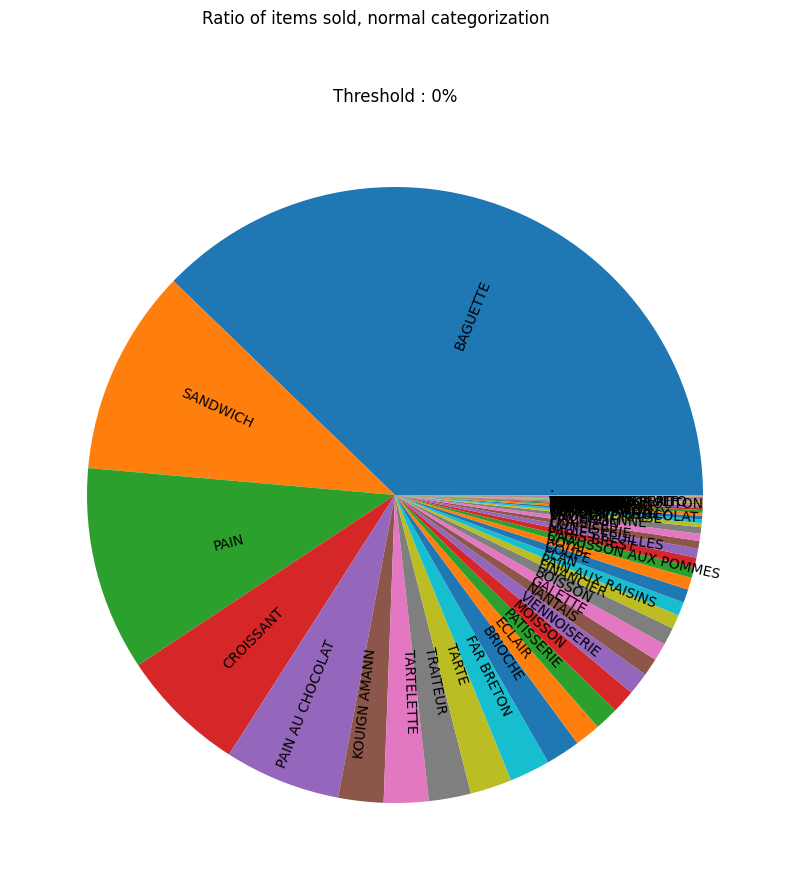

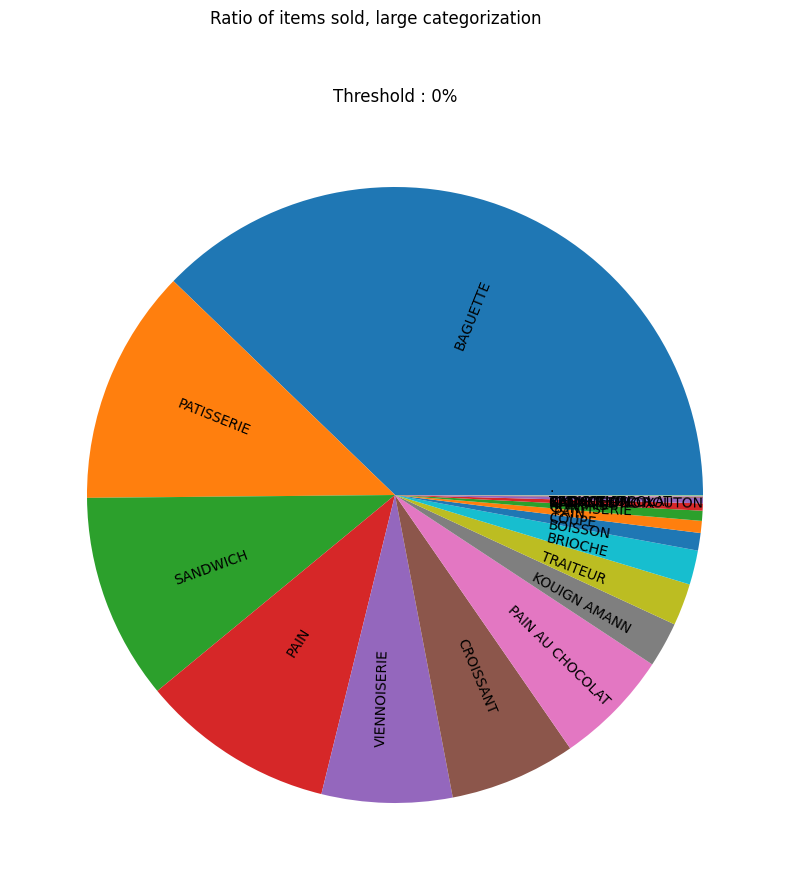

In [38]:
figures.getAnnualSales(normalGroupedDataFrame,[0],"normal categorization",NORMAL_GROUP)
figures.getAnnualSales(largeGroupedDataFrame,[0],"large categorization",LARGE_GROUP)

### Remarks
I did the same for 2021 and 2022 periods to illustration my Powerpoint presentation and README files.\
You will able to get same illustrations with different periods by changing `dataFrame` variable with `dataFrame2021` or `dataFrame2022` for example.

## Gephi files creation & maps
In order to use the dataset in Gephi, I deciced to use a bipartite graph to illustrate it.\
You will have :
- a part for transaction
- a part for articles

Each article could be linked to transactions but never with other articles, and each transaction is linked with aricles but with no other transactions.

In [39]:
graphes.createNodesEdges(dataFrame, "data/global/")

To generate a bipartite graph in Gephi, you will need :
- a `.csv` file for article nodes
- a `.csv` file for transaction nodes
- a `.csv` file for edges between nodes.

The outputs of this functions are 3 files :
- `articles-nodes.csv` for article nodes
- `tickets-nodes.csv` for transaction nodes
- `edges.csv` for edges

Using these files in Gephi, you can generate a map like this one :

!["Map"](images/maps/MAP_Global%20Illustration.png)

This map comes from the original dataset, without threshold or categorization.


## PageRank
It's important to know which article is more likely sold with others. To determine this, I use the PageRank to know the popularity among articles, for a referent article.\
Here is an example with the baguette, with the original dataset and the two categorized.

In [42]:
print("PageRank for BAGUETTE, original dataframe")
pageRankList = intels.pageRankScore(dataFrame,"BAGUETTE")
print("\n\nPageRank for BAGUETTE, normal categorized dataframe")
pageRankList = intels.pageRankScore(normalGroupedDataFrame,"BAGUETTE")
print("\n\nPageRank for BAGUETTE, large categorized dataframe")
pageRankList = intels.pageRankScore(largeGroupedDataFrame,"BAGUETTE")

PageRank for BAGUETTE, original dataframe
                   article  weighted
0                 BAGUETTE  0.363520
4                CROISSANT  0.122895
3     TRADITIONAL BAGUETTE  0.097657
1         PAIN AU CHOCOLAT  0.091401
8                    COUPE  0.056173
..                     ...       ...
84   TROPEZIENNE FRAMBOISE  0.000031
82               TRIANGLES  0.000031
79  ECLAIR FRAISE PISTACHE  0.000031
57      GAL POIRE CHOCO 4P  0.000031
56      GAL POIRE CHOCO 6P  0.000031

[110 rows x 2 columns]


PageRank for BAGUETTE, normal categorized dataframe
                article  weighted
0              BAGUETTE  0.528611
3             CROISSANT  0.108592
1      PAIN AU CHOCOLAT  0.083223
2                  PAIN  0.069397
4                 COUPE  0.055081
23           TARTELETTE  0.017532
29               ECLAIR  0.012124
11           PATISSERIE  0.011251
6          KOUIGN AMANN  0.010837
8               MOISSON  0.008978
5              SANDWICH  0.007989
12     PAIN AUX RAISINS  0.0

If you want to have the PageRank of every article, you can run the following code.\
The dataset used is the normal categorized with a 0.5% treshold.

In [43]:
normalGroupedThresholdDataFrame = manipulations.groupWithTreshold(
    normalGroupedDataFrame, 0.5
)
normalGroupedThresholdDataFrameAS = manipulations.calculateProportions(
    normalGroupedThresholdDataFrame
)
normalGroupedThresholdDataFrameAS = normalGroupedThresholdDataFrameAS.sort_values(
    by="proportion of annual sales", ascending=False
).reset_index()
listNormal = list(normalGroupedThresholdDataFrameAS["article"])
print(listNormal)
for i in range(len(listNormal)):
    print(str(listNormal[i]))
    pageRankList = intels.pageRankScore(
        normalGroupedThresholdDataFrame, str(listNormal[i])
    )
    print("\n")

/Users/arthur/Downloads/NSP/functions/manipulations.py:122: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  articlesGrouped[0] = "Others (" + str(othersArticlesNumber) + " articles)"


['BAGUETTE', 'SANDWICH', 'PAIN', 'CROISSANT', 'PAIN AU CHOCOLAT', 'Others (37 articles)', 'KOUIGN AMANN', 'TARTELETTE', 'TRAITEUR', 'TARTE', 'FAR BRETON', 'BRIOCHE', 'ECLAIR', 'PATISSERIE', 'MOISSON', 'VIENNOISERIE', 'NANTAIS', 'GALETTE', 'BOISSON', 'FINANCIER', 'PAIN AUX RAISINS', 'FLAN', 'COUPE', 'ROYAL', 'CHAUSSON AUX POMMES']
BAGUETTE
                 article  weighted
0               BAGUETTE  0.530505
3              CROISSANT  0.108982
1       PAIN AU CHOCOLAT  0.083521
2                   PAIN  0.069646
4                  COUPE  0.055279
17  Others (37 articles)  0.025921
19            TARTELETTE  0.017595
21                ECLAIR  0.012168
11            PATISSERIE  0.011291
6           KOUIGN AMANN  0.010875
8                MOISSON  0.009010
5               SANDWICH  0.008017
12      PAIN AUX RAISINS  0.007591
10               BRIOCHE  0.007095
20                  FLAN  0.005914
15            FAR BRETON  0.005873
16   CHAUSSON AUX POMMES  0.005833
14          VIENNOISERIE  0.0

## Louvain algorithm
I categorized articles based on my French intuition, but we can use the Louvain algorithm to see if it detects the same communities I decided.

In [63]:
graph = nx.from_pandas_edgelist(dataFrame,"ticket_number","article")
partition = algorithms.louvain(graph,resolution=1., randomize=False)
pos = nx.spring_layout(graph)

AttributeError: 'NodeClustering' object has no attribute 'values'

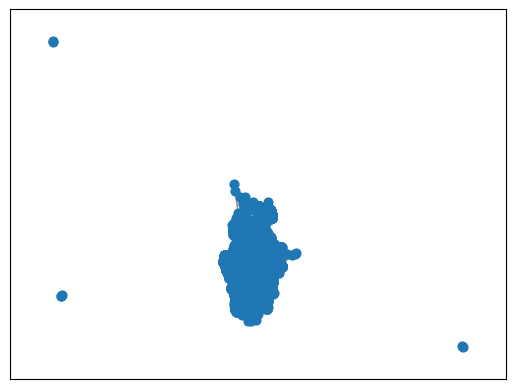

In [70]:
cmap = cm.get_cmap('viridis')
nx.draw_networkx_nodes(graph, pos, node_size=40,
                       cmap=cmap)
nx.draw_networkx_edges(graph, pos, alpha=0.5)
plt.show()

In [69]:
graph = nx.from_pandas_edgelist(dataFrame,"ticket_number","article")
partition = algorithms.louvain(graph,resolution=0.85)
pos = nx.spring_layout(graph)